In [50]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#prepocessing and Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
#Split Dataset into Train/Test
from sklearn.model_selection import train_test_split
#Linear regresion
from sklearn.linear_model import LinearRegression
#model evalution
from sklearn.metrics import mean_squared_error, r2_score
#data handling
from datetime import datetime




In [52]:
#load data

In [53]:
mdata = pd.read_csv('train.csv')

In [54]:
mdata.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [55]:
#check basic info

In [56]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [57]:
mdata.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [58]:
#handle missing value

In [59]:
mdata.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [60]:
# x = features
# y = target

In [61]:

target = mdata['revenue']
features = mdata[['budget', 'popularity', 'runtime']].copy()

In [70]:
#convert release date to data time
mdata['release_date'] = pd.to_datetime(mdata['release_date'], format='%Y-%m-%d') 

#extract year and month
mdata['release_year'] = mdata['release_date'].dt.year
mdata['release_month'] = mdata['release_date'].dt.month


In [71]:
print(mdata['release_date'].head(5))

0   2015-02-20
1   2004-08-06
2   2014-10-10
3   2012-03-09
4   2009-02-05
Name: release_date, dtype: datetime64[ns]


In [72]:
features['release_year'] = mdata['release_year']
features['release_month'] = mdata['release_month']

In [73]:
## Features → X ,Target → y

In [74]:
x = mdata[['budget', 'popularity', 'runtime', 'release_year', 'release_month']]
y = mdata['revenue']


In [75]:
#Split Dataset into Train/Test

In [76]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42 
)

In [77]:
# Fit Lenear Regression

In [89]:
from sklearn.impute import SimpleImputer  

# Create imputer object (replace NaN with column mean)
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the data
x_imputed = imputer.fit_transform(X)       


In [90]:
x_train, x_test, y_train, y_test = train_test_split(
    x_imputed,    
    y,            
    test_size=0.2,
    random_state=42
)

In [83]:
# Train model

In [91]:
model = LinearRegression()   
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
# Predict & Evaluate

In [105]:
mse = mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)                        

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 6611239228476831.0
RMSE: 81309527.29217426


In [140]:
#  Top Language

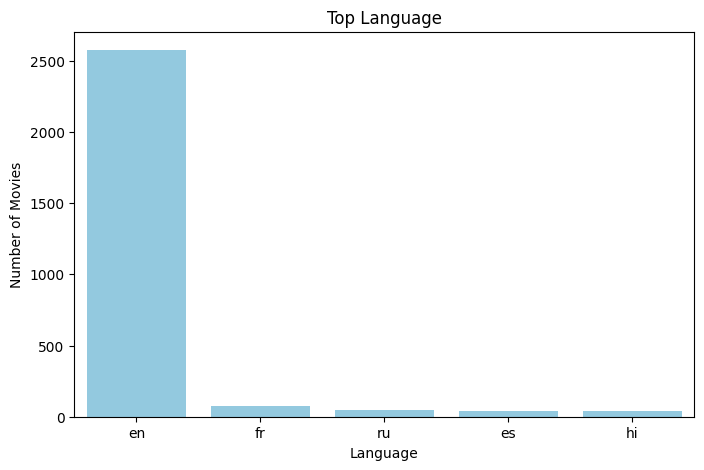

In [139]:
language_counts = mdata['original_language'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=language_counts.index, y=language_counts.values, color='skyblue')
plt.title("Top Language")
plt.xlabel("Language")
plt.ylabel("Number of Movies")
plt.show()

In [133]:
# Movie Status Distribution

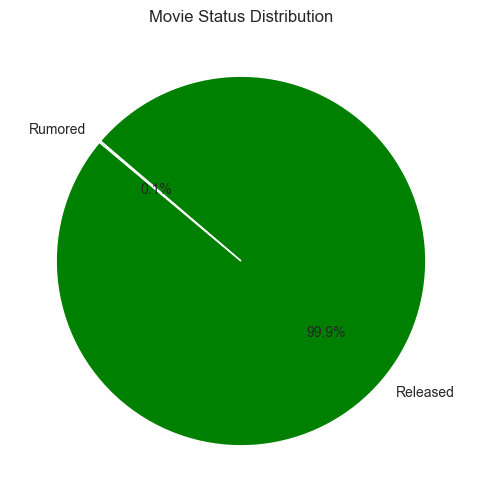

In [166]:
status_counts = mdata['status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['green','blue'])
plt.title("Movie Status Distribution")
plt.show()

In [134]:
# Feature Importance

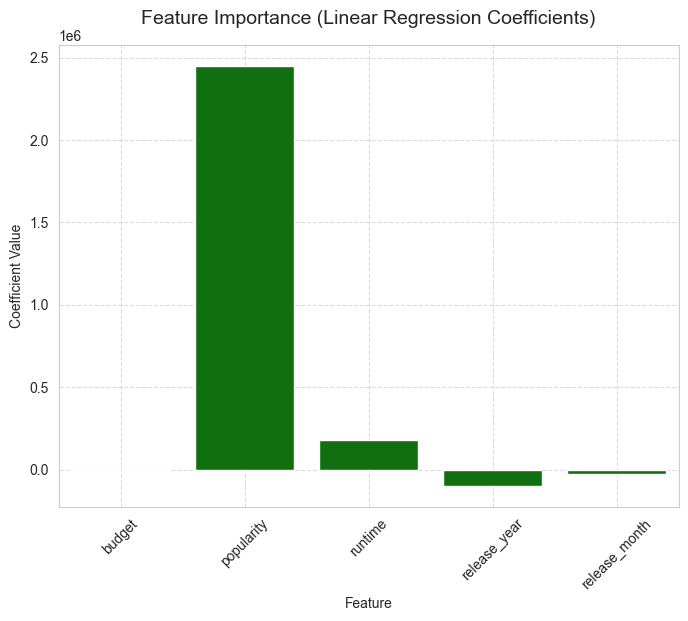

In [161]:
# Feature names and coefficients (assuming model.coef_ is defined)
feature_names = ['budget', 'popularity', 'runtime', 'release_year', 'release_month']
coefficients = model.coef_

# Create a DataFrame for better plotting
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Create vertical bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Coefficient', data=coef_df, color='green')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize title and labels
plt.title("Feature Importance (Linear Regression Coefficients)", pad=15, fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()

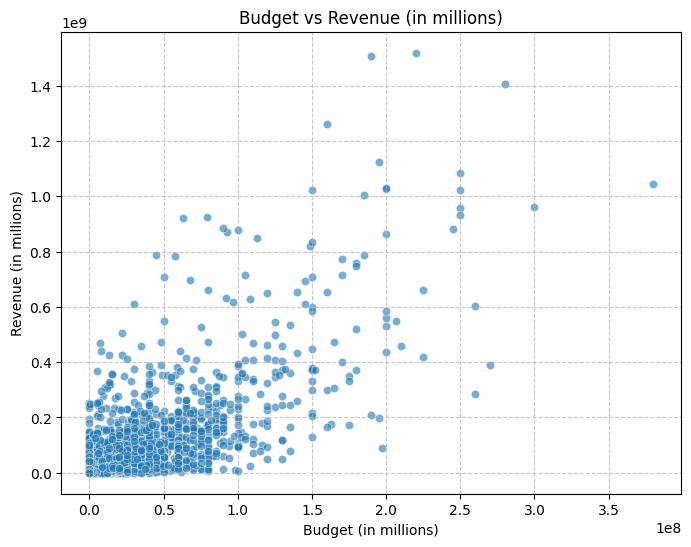

In [143]:
# Create scatter plot with larger figure size
plt.figure(figsize=(8, 6))

# Plot scatter with grid and custom labels
sns.scatterplot(x='budget', y='revenue', data=mdata, alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.7)

# Add title and labels with unit clarification
plt.title("Budget vs Revenue (in millions)")
plt.xlabel("Budget (in millions)")
plt.ylabel("Revenue (in millions)")

# Show plot
plt.show()


C:\Users\Ravindu Aluvihare\AppData\Local\Temp\ipykernel_20304\2163053338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


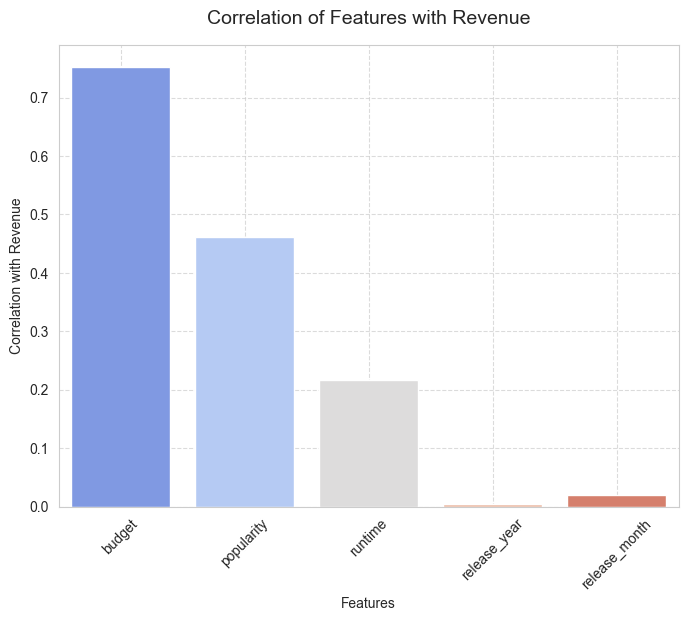

In [158]:
# Calculate the correlation of each feature with 'revenue'
correlations = mdata[['budget', 'popularity', 'runtime', 'release_year', 'release_month', 'revenue']].corr()['revenue'].drop('revenue')

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize title and labels
plt.title("Correlation of Features with Revenue", pad=15, fontsize=14)
plt.xlabel("Features")
plt.ylabel("Correlation with Revenue")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()


C:\Users\Ravindu Aluvihare\AppData\Local\Temp\ipykernel_20304\2029758573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_month', y='revenue', data=mean_revenue, palette='viridis')


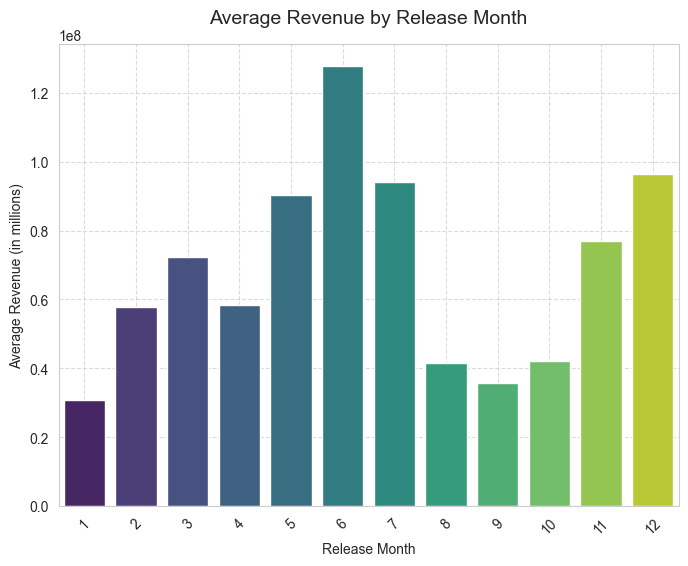

In [157]:
# Prepare data: Calculate mean revenue per release month
mean_revenue = mdata.groupby('release_month')['revenue'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='release_month', y='revenue', data=mean_revenue, palette='viridis')
plt.grid(True, linestyle='--', alpha=0.7)

# Customize title and labels
plt.title("Average Revenue by Release Month", pad=15, fontsize=14)
plt.xlabel("Release Month")
plt.ylabel("Average Revenue (in millions)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show plot
plt.show()